# Homework 2

## Introduction

### Important dates

* Homework release: Thursday, 7th November 2019
* **Homework due: Wednesday, 20th November 2019 (23:59 hours, 11:59 PM)**
* **Peer review due: Wednesday, 27th November 2019 (23:59 hours, 11:59 PM)**
* Grading release: Monday, 9th December 2019

**Some rules:**
* You are allowed to use any built-in Python library that comes with Anaconda. You should make heavy use of `sklearn`, which will save you from (re)implementing any of the classical machine learning algorithms yourself. If you want to use an external library, you have to justify your choice.
* Make sure you use the data folder provided in the repository in read-only mode.
* Be sure to provide textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
* Back up any hypotheses and claims with data, since this is an important aspect of the course.
* Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.
* Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
* **Important Note:** Owing to the scale of the datasets some tasks might take longer to finish, and hence, it is *recommended* that you start working on this homework as early as possible.

# Task A: Applied ML and Reading the Stats

## Description

You have been appointed as the manager/head-coach of Lausanne's men's football team [FC Lausanne-Sport](https://en.wikipedia.org/wiki/FC_Lausanne-Sport), and as a first step towards improving the team you decide to hire a new player. One way to assess the quality of a player would be to watch the games in which he participates. Since there are 22 players on the field, he will typically only have the ball for around 5-10 minutes per game. In addition, the ADA homework takes up all your free time, and hence, you need a more efficient and elegant solution.

You hypothesize that perhaps looking at the *physical capabilities* of the candidates such as *'running'* and *'jumping'* might be a good enough proxy for their skill as a football player. Thus, you come up with the idea of letting candidate players do just a couple of exercises such as *'100m sprint'* and *'high jump'*, and decide on one of the candidates based on his performance in these exercises. Because you are an aspiring data scientist, you want to use machine learning to optimize the player selection.

You come across a dataset of players from the football video game [FIFA 19](https://www.ea.com/games/fifa/fifa-19), which contains hand-annotated data about thousands of real-world football players, in particular about their skills in different domains.
Each row of the dataset corresponds to a player (you might recognize some of them). It contains information such as the player's nationality and their market value. However, the attributes that we are interested in are the skills of the players in various footballing aspects such as *'agility'*, *'dribbling'*, or *'heading accuracy'*. Apart from one attribute (see **A2.1.**), all of them are *non-negative* values in different bounded ranges, where a *higher value* corresponds to the *player being better* in that skill.

### A1. Getting a sense of the data

#### A1.1.
Load the data present at `data/fifa19_players.csv` into a Pandas DataFrame.

In [1]:
''' Imports '''
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score, validation_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
#Import data
fifa = pd.read_csv('data/fifa19_players.csv', delimiter=',')

#Display generic information
display(fifa.describe(), fifa.head())

,Unnamed: 0,Unnamed: 0.1,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9092.013051,9092.013051,214279.590286,25.122529,66.249904,71.319126,1597.903959,1.113222,2.947299,2.361308,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5258.642938,5258.642938,29968.461880,4.670568,6.914613,6.134420,272.862270,0.394031,0.660456,0.756164,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4539.500000,4539.500000,200300.000000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9079.000000,9079.000000,221743.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13666.500000,13666.500000,236508.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### A1.2.
The column *'Overall'* contains a score representing the overall performance of a football player. Before you start, you want to make sure that there is enough diversity in the dataset to draw meaningful conclusions (e.g. it shouldn't be the case that all players come roughly from the same skill class).
* First, think about what kind of distribution you would expect for the overall scores.
* Moving ahead, plot a histogram of the scores with *30 equal-width bins* and analyze the plot. Is this the distribution that you had expected?

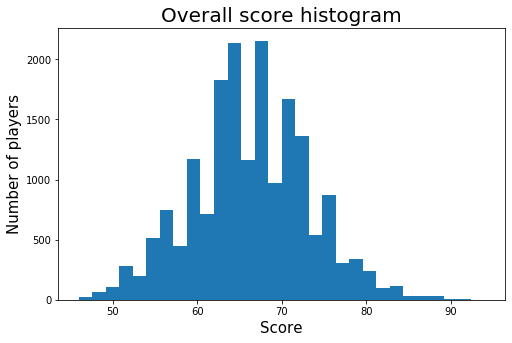

In [3]:
#------------------Histogram plotting---------------------#
overall_col = fifa['Overall']
plt.figure(figsize=(8,5))
plt.title("Overall score histogram", fontsize = 20)
plt.xlabel("Score", fontsize = 15)
plt.ylabel("Number of players", fontsize = 15)
plt.hist(overall_col, bins = 30)
plt.show()

#### Answer A1.2. 
We might expect a normal distribution of our data. Given the fact that majority of players are average and that there exists less brilliant players and everybody wants to have as little bad players as possible.

The observed distribution is fairly similar to the normal bell shaped distribution. However, we observe unregular drops at almost every other bin. We will investigate that in next question.

#### A1.3.
If you observe differences from what you expected in **A1.2.**, they might be due to a misrepresentation by the plot. Carefully study the actual values in the *'Overall'* column and **fix** the histogram accordingly! Redo the plot of step A1.2., and briefly state your observations.

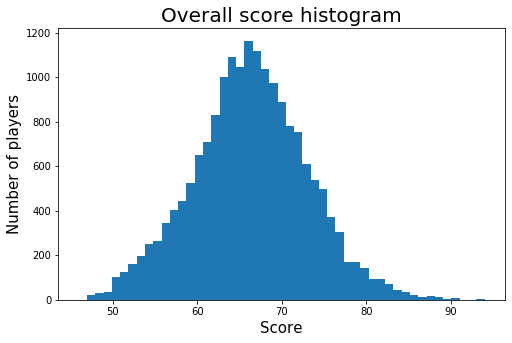

The number of unique values of overall score is 48
List of unique values: [94 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70
 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46]


In [4]:
#------------------Histogram plotting---------------------#
plt.figure(figsize=(8,5))
plt.title("Overall score histogram", fontsize = 20)
plt.xlabel("Score", fontsize = 15)
plt.ylabel("Number of players", fontsize = 15)
plt.hist(overall_col, bins = 49)
plt.show()

print("The number of unique values of overall score is {}".format(len(overall_col.unique())))
print("List of unique values: {}".format(overall_col.unique()))

#### Answer A1.3. 
After looking at the **Overall Score** more closely, we found out that there are 48 unique values ranging from 46 to 94 and that within this range, no player has the score of 93. Therefore setting the number of bins to 49 gives each value its own bin and we can even observe the gap at the score 93. Moreover, the expected normal shaped curve is clearly observable.

### A2. Preprocessing

The features that you will use for the remainder of the tasks are the following; you can safely discard the rest of the columns.

In [5]:
skills = ['Overall', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [6]:
#Keep only relevant columns
fifa = fifa[skills]

#### A2.1.
Since your final goal will be to train a *linear machine learning model*, all of the features you use need to be *numerical*. 'Work Rate' refers to how much effort a player puts into his play when attacking and defending, respectively, but it is non-numeric and non-atomic. Transform the feature into _two_ numerical features.

In [7]:
''' Add your code here '''
#Splits one column into 2
fifa['Offense'], fifa['Defense'] = fifa['Work Rate'].str.split('/ ', 1).str

#Changes categorical data into numerical
fifa['Offense'] = pd.factorize(fifa['Offense'])[0]
fifa['Defense' ]= pd.factorize(fifa['Defense'])[0]

#Drops the unwanted "Work Rate" column
fifa.drop(columns = ['Work Rate'], inplace = True)
fifa.head()

,Overall,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Offense,Defense
0,94,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,0,0
1,94,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,1
2,92,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,0
3,91,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,0,0
4,91,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,2


#### A2.2.
As it is true for any real-world dataset out there, you might encounter *missing values*. There are numerous ways to *impute* them (fill them up) by looking at records for which these values are not missing.
* Use a *simple aggregation* of the records for which the values are present (not missing) to fill in the missing values.
* Briefly *justify* the choice of your *aggregation scheme*.

In [8]:
#Replace nan cells with the median of the column
fifa = fifa.apply(lambda x: x.fillna(x.median()),axis=0)

#### Answer A2.2.
We have chosen to replace nan cells with the median of a given column. Applying this kind of aggregation to impute data is easy and fast and looking at the data, only 5 rows have missing values. Moreover, we have replaced categorical data with numerical so mean can be applied. However, using median does not factor the correlations between features so next time we might consider using KNN to find players which are the closes to the palyer with missing values and we would take only the mean or median of the values of the players who are the closest.

## A3. Building a regression model

By letting them perform exercises, you have gathered data about the following athletic skills (except for the *overall football performance*) of your candidate players:

In [9]:
athletic_skills = ['Overall', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'Jumping', 'Stamina', 'Strength']

In [10]:
#Keep only athletic skills
fifa_athletic_skills = fifa[athletic_skills]
fifa_athletic_skills.head()

,Overall,Acceleration,SprintSpeed,Agility,Reactions,Balance,Jumping,Stamina,Strength
0,94,91.0,86.0,91.0,95.0,95.0,0.68,72.0,59.0
1,94,89.0,91.0,87.0,96.0,70.0,0.95,88.0,79.0
2,92,94.0,90.0,96.0,94.0,84.0,0.61,81.0,49.0
3,91,57.0,58.0,60.0,90.0,43.0,0.67,43.0,64.0
4,91,78.0,76.0,79.0,91.0,77.0,0.63,90.0,75.0


To decide which player to hire, you need to know how these skills transfer to football performance.

To predict the football performance of a player, you want to build a linear model with an additional regularization term to prevent overfitting. The specific model used in this exercise is L2-regularized linear regression, aka "Ridge Regression". It combines the least squares linear regression model that you know from the lecture with a penalty on the norm of the weight vector [1]. The function that Ridge Regression minimizes is

$$||y-Xw||_2^2 + \alpha ||w||_2^2,$$

where $y$ is a vector of overall ratings, $X$ is the matrix of data vectors with each *row* being the features of a football player, $w$ is the weight vector, and $\alpha$ is the (non-negative) regularization parameter.

[1] If there are enough model parameters, a powerful machine learning model will be able to "memorize" the value it is supposed to predict for some training examples. That means, it will perform well on those training examples, but will perform much worse on data that was not used for training. One way to counter this is to penalize large weight values. This can be thought of as reducing the complexity of the model.

### A3.1.
Split the data randomly into a train (70%) and a test set (30%). Use 1 as the random seed.

In [11]:
#Features used for training
X = fifa_athletic_skills.drop("Overall", axis = 1)
#Predicted feature
y = fifa_athletic_skills['Overall']

#Split the data using train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.70, test_size=0.30, random_state=1)

### A3.2.
Build a Ridge Regression model that predicts a player's overall football performance from the other feature in the list above (sklearn might be helpful here).

Ridge Regression has a regularization parameter $\alpha$. Optimize it in the range [0, 2000] via cross validation. Use as a metric the mean squared error. Plot the cross-validation error as a function of the regularization parameter and choose the best parameter for your final model.

In [12]:
#Range for alpha
param_range = np.arange(0,2000)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(Ridge(), 
                                             X_train, 
                                             y_train, 
                                             param_name="alpha", 
                                             param_range=param_range,
                                             cv=10, 
                                             scoring="neg_mean_squared_error", 
                                             n_jobs=-1)

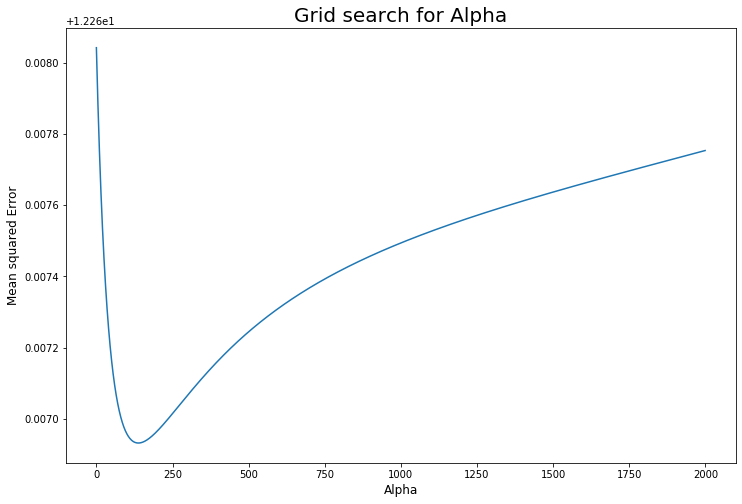

The alpha with the lowest MSE was: 138


In [13]:
#--------------------Figure plotting------------------------------#
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(range(2000), -np.mean(test_scores, axis=1))
ax.set_xlabel('Alpha', fontsize = 12)
ax.set_ylabel('Mean squared Error', fontsize = 12)
plt.title("Grid search for Alpha", fontsize = 20)
plt.show()

print("The alpha with the lowest MSE was: {}".format(np.argmin(-np.mean(test_scores, axis=1))))

### Answer A3.2.
Using the grid search of values ranging from 0 to 2000, the lowest mean squared error was found when alpha was equal to 138.

## A4. Feature importance

Hiring new players isn't the only job of a manager/head-coach; another important one is training players. While you are at it, you think, why not use the insights gained from the hiring process to also improve the training process of your entire team? Since a training session can only last a limited amount of time and there are several possible exercises to do, you want to know which athletic skill should your training process focus the most upon. Your idea is to use the *weights* of your regression model as a guidance: In your opinion, a *higher weight* for an athletic skill should mean that this skill is highly *predictive* of the football performance.

### A4.1.
* Print the weights. Why might it *not* be a good idea to use them as they are for gauging a skill's importance?
* How can you fix this?
* What has changed due to your fix?

*Hint: Some skills could get disadvantaged (carefully study the ranges of the corresponding features)! This can be prevented by another preprocessing step discussed in the lecture that takes care of differing ranges, after which you need to train the model again.*

In [14]:
#Compute weights before data normalization
ridge_old_weights = Ridge(alpha = 138)
ridge_old_weights.fit(X_train, y_train)
old_weights_display = X_train.describe().loc[['min','max']].append(pd.DataFrame([ridge_old_weights.coef_], columns = athletic_skills[1:], index = ['Weights']))

#Normalise data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

#Create dataframe to display the transformed data
X_train_scaled_dataframe = pd.DataFrame(X_train_scaled)
X_train_scaled_dataframe.columns = athletic_skills[1:]

#Compute weights after data normalization
ridge_new_weights = Ridge(alpha = 138)
ridge_new_weights.fit(X_train_scaled, y_train)
new_weights_display = X_train_scaled_dataframe.describe().loc[['min','max']].append(pd.DataFrame([ridge_new_weights.coef_], columns = athletic_skills[1:], index = ['Weights']))

print("Range and weights before normalization")
display(old_weights_display)
print("Range and weights after normalization")
display(new_weights_display)

Range and weights before normalization


,Acceleration,SprintSpeed,Agility,Reactions,Balance,Jumping,Stamina,Strength
min,12.000000,12.000000,14.00000,21.000000,16.000000,0.150000,12.000000,24.000000
max,97.000000,96.000000,96.00000,96.000000,96.000000,0.950000,96.000000,97.000000
Weights,0.003232,0.015802,0.04796,0.605194,-0.032522,0.297891,-0.007393,0.071881


Range and weights after normalization


,Acceleration,SprintSpeed,Agility,Reactions,Balance,Jumping,Stamina,Strength
min,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
Weights,0.315143,0.49052,4.01769,24.310843,-0.994971,1.887707,2.593106,6.442461


### Answer A4.1.
It might not be a good idea to use them to estimate a skill's importance because the skills/features have different ranges. As we can see, in our case the range of **Jumping** feature is much smaller than the rest of the features. As a result two skills with different ranges can contribute differently to the outcome. For example, one of the features might have a much smaller range, thus resulting in that skill being under-represented in the actual contribution it provides. On the other hand, features with large values dominate the others, and the classifier tends to over-optimize them

We can fix this using data preprocessing such as normalization or standartization. We have chosen normalization. Therefore the ranges of all features are from 0 to 1. 

After the fix, the magnitude of weights have increased in every skill. Moreover, we can observe that the relative difference between features has increased as well.

### A4.2.
* After the *fix* in step A4.1., is everything fine now with the weights? Sort the weights in descending order. Do you observe anything unexpected with the lowest-ranked weights?
* Do you have an idea what could be the potential cause for this? (No need to analytically prove your hypothesis.)
* Come up with a better way to gauge the importance of a feature for the overall performance.

In [15]:
print("The weights after sorting:")
display(new_weights_display.loc[["Weights"]].sort_values(by = "Weights", axis = 1))

The weights after sorting:


,Balance,Acceleration,SprintSpeed,Jumping,Stamina,Agility,Strength,Reactions
Weights,-0.994971,0.315143,0.49052,1.887707,2.593106,4.01769,6.442461,24.310843


### Answer A4.2.
After sorting the weights we observe that the smallest weight is negative. This is somewhat surprising because all the features present useful skills needed to perform better. However, when we look at the feature labels, we find out that the negative value belongs to the **balance** feature. Our hyphothesis is that the players tend to dive (fall down on purpose) to get an advantage for their team, therefore losing their balance. A player who gains more advantages (penalties, free kicks) have more opportunities to score so their overall score might be better.

A better wait to estimate the importance of a feature is to use statistical approaches such as Pearson's coefficient to measure the correlation of the feature with the outcome variable, i.e. overall score. Moreover, since our goal is to get the best performing model, we could use approaches such as forward selection of features, where we start with one feature and, measure the performance of the model and keep adding features to determine if the model's performance has increased or decreased.

In [16]:
#Normalise all data
scaler = MinMaxScaler()
fifa_athletic_skills_scaled = scaler.fit_transform(fifa_athletic_skills)

#Create dataframe to display the transformed data
fifa_athletic_skills_scaled_dataframe = pd.DataFrame(fifa_athletic_skills_scaled)
fifa_athletic_skills_scaled_dataframe.columns = athletic_skills

#Correlation of individual features with overall score
display(pd.DataFrame(fifa_athletic_skills_scaled_dataframe.corr()["Overall"][1:].sort_values(ascending=False)))

,Overall
Reactions,0.850045
Stamina,0.365656
Strength,0.349326
Agility,0.264952
Jumping,0.264435
SprintSpeed,0.210675
Acceleration,0.196869
Balance,0.103160


The list shows as how each feature is correlated with the final overall score. The **Reactions** feature seems to be the most correlated with the overall score therefore this could be a strong indicator that it is the most important feature, i.e. if a player has exceptional reactions, he will have most likely a high overall score too. Moreover, the **Balance** feature has shown to be the least correlated, therefore having the least impact on overall score.

## A5. Model Improvements

During the ongoing recruiting process, it turns out that attending all the ADA lectures and tutorials has paid off: Solving the ADA homework went like a charm and you are already done with it. Now you wonder whether it is worth going to some football games of the candidates to assess their football-related skills explicitly, and include these skills in training your ML model.

### A5.1. Improving the model
Train a second model, this time also including as features the football-related skills from the list in the step **A2**. Again use cross validation to compute the best hyperparameter in the range [0,2000].

In [17]:
#---------------------Normalized all skills-------------------------------------#
#Prepare X: training data and y: values to be estimated
X = fifa.drop('Overall', axis=1)
y = fifa['Overall']

#Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#Split the data using train_test_split function
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_scaled, y,train_size = 0.70, test_size=0.30, random_state=1)

#Range for alpha
param_range = np.arange(0,2000)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(Ridge(), 
                                             X_train_all, 
                                             y_train_all, 
                                             param_name="alpha", 
                                             param_range=param_range,
                                             cv=10, 
                                             scoring="neg_mean_squared_error", 
                                             n_jobs=-1)

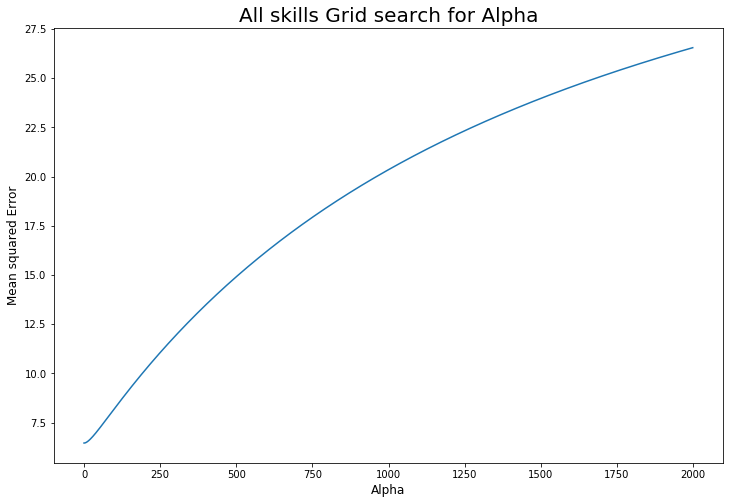

The alpha with the lowest MSE was: 1


In [18]:
#--------------------Figure plotting------------------------------#
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(range(2000), -np.mean(test_scores, axis=1))
ax.set_xlabel('Alpha', fontsize = 12)
ax.set_ylabel('Mean squared Error', fontsize = 12)
plt.title("All skills Grid search for Alpha", fontsize = 20)
plt.show()

print("The alpha with the lowest MSE was: {}".format(np.argmin(-np.mean(test_scores, axis=1))))

In [19]:
#---------------------Normalized athletic skills-------------------------------------#
#Features used for training
X = fifa_athletic_skills.drop("Overall", axis = 1)
#Predicted feature
y = fifa_athletic_skills['Overall']

#Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#Split the data using train_test_split function
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_scaled, y,train_size = 0.70, test_size=0.30, random_state=1)

#Range for alpha
param_range = np.arange(0,2000)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(Ridge(), 
                                             X_train_selected, 
                                             y_train_selected, 
                                             param_name="alpha", 
                                             param_range=param_range,
                                             cv=10, 
                                             scoring="neg_mean_squared_error", 
                                             n_jobs=-1)

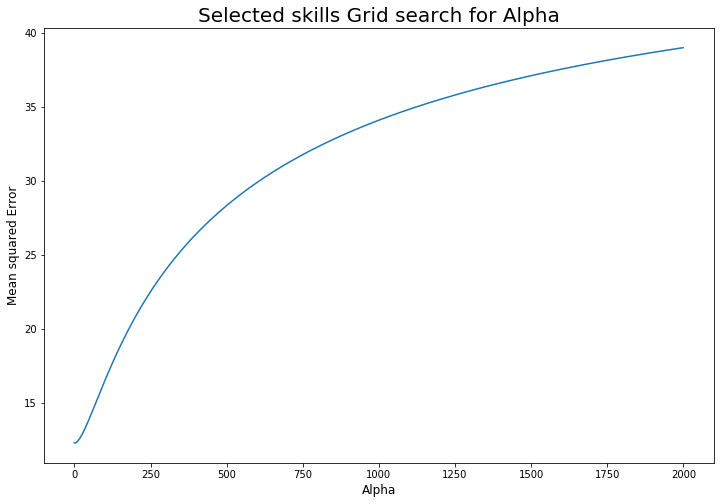

The alpha with the lowest MSE was: 0


In [20]:
#--------------------Figure plotting------------------------------#
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(range(2000), -np.mean(test_scores, axis=1))
ax.set_xlabel('Alpha', fontsize = 12)
ax.set_ylabel('Mean squared Error', fontsize = 12)
plt.title("Selected skills Grid search for Alpha", fontsize = 20)
plt.show()

print("The alpha with the lowest MSE was: {}".format(np.argmin(-np.mean(test_scores, axis=1))))

### A5.2. Assessing the improvement
Compute *bootstrap confidence intervals* for the mean squared error that the two models (trained in the steps **A3** and **A5.1**) make. Retrain both models *1000 times*, each time with a different random train/test split, and compute the respective mean squared errors.   
*Note: Use the 'optimal regularization parameters' already found via cross validation in steps **A3** and **A5.1**.*

* Find the *two-sided 95% confidence intervals* via bootstrap resampling and plot the mean error together with the confidence interval in a bar plot.
* What can you say about the properties of the models based on the confidence intervals?
* Do you have sufficient evidence to claim that one model is clearly better than the other? Clearly explain your observations!

In [21]:
#Stores mean squared errors of both models
errors_all_skills = []
errors_selected_skills = []

#Size of the training set
n = y_train_all.size

#Create Pandas dataframe
#We created the tables because otherwise we received error that the input contains nan, even thought it didn't
athletic_skills_table = pd.DataFrame(X_train_selected)
athletic_skills_table.columns = athletic_skills[1:]

all_skills_table = pd.DataFrame(X_train_all)
all_skills_table.columns = fifa.columns[1:]

#Bootstrap resampling
for i in range(1000):
    np.random.seed = i
    
    #Creates indeces with repetion used to select data samples
    indeces = np.random.choice(range(n), size=n, replace=True)
    
    #Train model with selected features
    ridge = Ridge(alpha = 0)
    predicted_r = cross_val_predict(ridge, athletic_skills_table.iloc[indeces], y_train_selected.iloc[indeces], cv=10)
    errors_selected_skills.append(mean_squared_error(y_train_selected.iloc[indeces], predicted_r))
    
    #Train model with all features
    ridge = Ridge(alpha = 1)
    predicted_r = cross_val_predict(ridge, all_skills_table.iloc[indeces], y_train_all.iloc[indeces], cv=10)
    errors_all_skills.append(mean_squared_error(y_train_all.iloc[indeces], predicted_r))

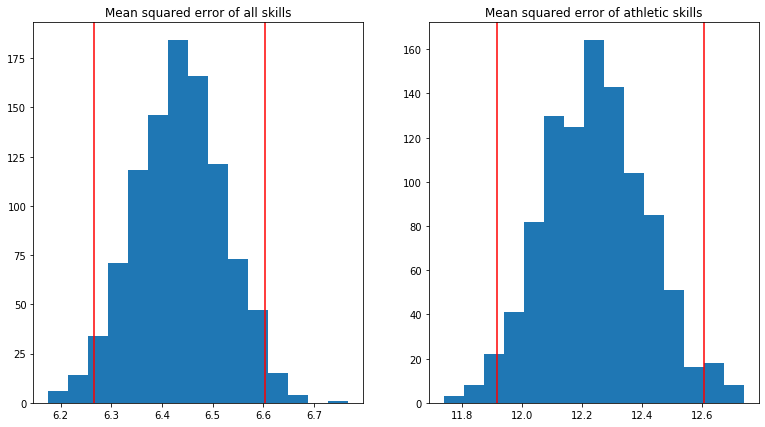

In [22]:
#Confidence intervals
CI_all_skills = np.percentile(errors_all_skills, [2.5, 97.5])
CI_athletic_skills = np.percentile(errors_selected_skills, [2.5, 97.5])

#-------------------Plotting histograms ----------------------------#
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
ax1.title.set_text('Mean squared error of all skills')
ax2.title.set_text('Mean squared error of athletic skills')
ax1.hist(errors_all_skills, bins = 15)
ax2.hist(errors_selected_skills, bins = 15)

#Plot confidence intervals
for i in range(len(CI_all_skills)):
    ax1.axvline(CI_all_skills[i], color = 'r')
    ax2.axvline(CI_athletic_skills[i], color = 'r')

plt.show()

Range of CI of athletic skills is: 0.688863 whereas range of CI of all skills model is: 0.338379


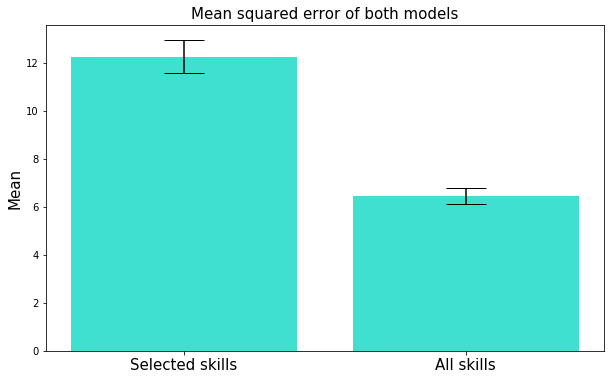

The 95% interval using the selected features is: [11.91675528 12.60561792] whereas when using every feature it is: [6.26608649 6.60446555]


In [23]:
#Calculate range of Confidence intervals
CIs = [CI_athletic_skills[1]-CI_athletic_skills[0], CI_all_skills[1]-CI_all_skills[0]]
print("Range of CI of athletic skills is: {:f} whereas range of CI of all skills model is: {:f}".format(CIs[0], CIs[1]))

#----------------------------Plotting-------------------------------#
means = [np.mean(errors_selected_skills), np.mean(errors_all_skills)]
bars = ['Selected skills', 'All skills']
y_pos = np.arange(len(bars))

plt.figure(figsize =(10, 6))
plt.bar(y_pos, means, yerr = CIs, capsize=20, color = "turquoise")
plt.xticks(y_pos, bars, fontsize = 15)
plt.title("Mean squared error of both models", fontsize = 15)
plt.ylabel("Mean", fontsize = 15)
plt.show()

print("The 95% interval using the selected features is: {} whereas when using every feature it is: {}".format(CI_athletic_skills, CI_all_skills))

### Answer A5.2.
Based on the results we can observe that the two-sided 95% confidence intervals have values of **[11.92 12.60]** for selected skills and **[6.27 6.61]** when we train with all skills. The 95% confidence interval defines a range of values that we can be 95% certain contains the population mean. Given these values and the large size of the train data set we can say that the sample mean is close to the true mean of the error therefore our models work consistently. However, we have used bootstrapping method which does not provide any new data which could be a problem if our data sample is biased.

On the first look, we could easily conclude that the model containing all skills performs better because of the lower mean error. Moreover, the size of range for selected skills was almost twice as big as for all skills; **0.64** and **0.34** respectively. However, to truly find out the performance of a model we should test it on unseen data. We could conclude that with this data set, having more features has proven to get better results.

Moreover, we can try to use other measures such as R2 score. In the next cell we have tested the models on the unseen 30% data, finding out the R2 value, which has confirmed that the model with all data has better performance. Nevertheles, more testing should be done to confirm this statement.

In [24]:
#Testing on test set using R2 evaluation
ridge = Ridge(alpha = 0)
ridge.fit(X_train_selected, y_train_selected)
selected_score = ridge.score(X_test_selected, y_test_selected)

    
ridge = Ridge(alpha = 1)
ridge.fit(X_train_all, y_train_all)
all_score = ridge.score(X_test_all, y_test_all)

print("The R2 score using the selected features is: {:f} whereas when using every feature it is: {:f}".format(selected_score, all_score))

The R2 score using the selected features is: 0.734931 whereas when using every feature it is: 0.864872


# Task B: Scaling up

## Description

[Reddit](https://www.reddit.com/) aka *'the front page of the internet'* is a network of over a million *communities* aka *'subreddits'*, each of which covers a different topic based on people's interests. In other words, it is a *massive* collection of forums (corresponding to the aforementioned communities), where people can share content specific to a given topic or comment on other people’s posts.   

You are reddit's community manager and want to *appoint new moderators*. Because moderating a specific subreddit isn't a full-time job, you want the chosen moderators to moderate multiple subreddits at the same time. To make this choice effective, the moderators shouldn't have to spend too much time getting to know the community and the prevalent communication style, so it makes sense to let moderators moderate subreddits that are similar in communication style and language. At the same time, it also makes sense to let them moderate subreddits that are similar with respect to the participating users, because this allows moderators to track the behavior of individual users over multiple subreddits. For example, some users might only post offensive content once a month on a given subreddit, and therefore fly under the radar with someone moderating only that subreddit. However, considering all the subreddits these users post to, they might post something offensive every day but on different subreddits. Thus, a moderator in charge of all these subreddits would be able to ban such users much more effectively. In the light of the above description, your task is to find out ways to choose moderators considering both the textual content and the users of a subreddit.

### Dataset:
The dataset provided to you includes all the posts of the 15 largest subreddits written as of May 2015.

Reddit posts (provided to you via a [google drive folder](https://drive.google.com/a/epfl.ch/file/d/19SVHKbUTUPtC9HMmADJcAAIY1Xjq6WFv/view?usp=sharing))
```
reddit_posts
 |-- id: id of the post 
 |-- author: user name of the author 
 |-- body: text of the message
 |-- subreddit: name of the subreddit
```

Reddit scores (provided to you via a [google drive folder](https://drive.google.com/a/epfl.ch/file/d/1vr4PolJzTXr6ODSe3ucib5EAyp3rjxec/view?usp=sharing))
```
reddit_scores
 |-- id: id of the post 
 |-- score: score computed as sum of UP/DOWN votes
```

*Note: Jaccard similarity between subreddits represented using either the set of top-1000 words or the set of users can be computed locally (on the driver), however, all the other tasks have to be implemented in Spark.*

## B1. Getting a sense of the data

Start a PySpark instance...

In [25]:
import pyspark
import pyspark.sql
from pyspark.sql import *
from pyspark.sql.functions import *

conf = pyspark.SparkConf().setMaster("local[*]").setAll([
                                   ('spark.executor.memory', '24g'),  # find
                                   ('spark.driver.memory','12g'), # your
                                   ('spark.driver.maxResultSize', '6G') # setup
                                  ])
# create the session
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# create the context
sc = spark.sparkContext

# FIX for Spark 2.x
locale = sc._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))

... and load the data in a Spark dataframe.

In [26]:
''' Add your code here '''
Reddit_posts = spark.read.json("messages.json.gz")
Reddit_scores = spark.read.json("score.json.gz")

### B1.1. Identify the most active subreddit

Print the list of subreddits along with the following information:
1. The total number of posts
2. The number of users with at least 1 message
3. The mean message length

*Note: Keep everything in one single dataframe and print the list sorted by number of posts in descending order.*

In [27]:
''' Add your code here '''
Reddit_posts.registerTempTable("Reddit_posts")

query = """
SELECT subreddit, count(*) as PostCount, count(DISTINCT author) as Contributing_users, avg(length(body)) as MessageLength
FROM Reddit_posts
GROUP BY subreddit
ORDER BY PostCount DESC
"""

posts_counts = spark.sql(query)
posts_counts.show()

+---------------+---------+------------------+------------------+
|      subreddit|PostCount|Contributing_users|     MessageLength|
+---------------+---------+------------------+------------------+
|leagueoflegends|  1151287|            119321|152.72280760574904|
|            nba|   704862|             45034|106.48656758344187|
|          funny|   691139|            224077|106.82283882113438|
|           pics|   564502|            205305| 114.9710045314277|
|            nfl|   534345|             41593|148.96989211090212|
|         videos|   511492|            157628|170.22702603364274|
|           news|   477658|             98736| 230.9491602778557|
| DestinyTheGame|   471160|             37008|165.41786866457255|
|         soccer|   455215|             41648|134.42224663071295|
|          DotA2|   445154|             41466|141.48906670500546|
|      worldnews|   439417|             99261|224.93754679495785|
|  AdviceAnimals|   411902|            115815| 159.2513801826648|
|         

In [28]:
#converting the spark result to pandas dataframe
posts_count_pd = posts_counts.toPandas()
posts_count_pd.head()

,subreddit,PostCount,Contributing_users,MessageLength
0,leagueoflegends,1151287,119321,152.722808
1,nba,704862,45034,106.486568
2,funny,691139,224077,106.822839
3,pics,564502,205305,114.971005
4,nfl,534345,41593,148.969892


### B1.2. Identify the largest subreddit

Print *two* different lists of subreddits: ordered by (1) the number of posts, and (2) the number of users. For each subreddit, print the name and the corresponding counts.

Additionally, (3) plot the mean of message length for each subreddit in descending order. Visualise the statistical significance by plotting the 99% confidence intervals for each subreddit as well.

In [29]:
''' Add your code here '''
display(posts_count_pd[['subreddit','PostCount']], posts_count_pd[['subreddit','Contributing_users']].sort_values(['Contributing_users'], ascending=False).reset_index(drop = True))

,subreddit,PostCount
0,leagueoflegends,1151287
1,nba,704862
2,funny,691139
3,pics,564502
4,nfl,534345
5,videos,511492
6,news,477658
7,DestinyTheGame,471160
8,soccer,455215
9,DotA2,445154


,subreddit,Contributing_users
0,funny,224077
1,pics,205305
2,videos,157628
3,leagueoflegends,119321
4,AdviceAnimals,115815
5,worldnews,99261
6,news,98736
7,movies,92484
8,GlobalOffensive,46686
9,nba,45034


In [30]:
''' Add your code here '''
Reddit_posts.registerTempTable("Reddit_posts_length")

query = """
SELECT subreddit, length(body) as MessageLength
FROM Reddit_posts
"""

posts_counts_lengths = spark.sql(query)
posts_counts_lengths.show()

+---------------+-------------+
|      subreddit|MessageLength|
+---------------+-------------+
|            nba|           54|
|GlobalOffensive|          212|
|           pics|           33|
|leagueoflegends|          446|
|  AdviceAnimals|         1036|
|         videos|         1925|
|            nba|           96|
|            nba|           90|
|           news|           82|
|         movies|          146|
|            nfl|          134|
|            nfl|           31|
|         videos|          359|
|          DotA2|           29|
|            nfl|           36|
|leagueoflegends|          451|
|            nfl|           38|
|            nfl|          111|
|         hockey|           72|
|  AdviceAnimals|           20|
+---------------+-------------+
only showing top 20 rows



In [31]:
#The length of each message in the give subreddit, needed to calculate the 99% Confidence interval
messages_lengths = posts_counts_lengths.groupBy("subreddit").agg(collect_list("MessageLength").alias("lengths"), avg(col("MessageLength")))
messages_lengths.show()

+---------------+--------------------+------------------+
|      subreddit|             lengths|avg(MessageLength)|
+---------------+--------------------+------------------+
|         hockey|[72, 35, 35, 128,...| 95.37287230080472|
|         videos|[1925, 359, 191, ...|170.22702603364274|
|          DotA2|[29, 39, 147, 21,...|141.48906670500546|
|           news|[82, 220, 111, 11...| 230.9491602778557|
|  AdviceAnimals|[1036, 20, 22, 45...| 159.2513801826648|
| DestinyTheGame|[94, 31, 10, 53, ...|165.41786866457255|
|           pics|[33, 130, 71, 54,...| 114.9710045314277|
|      worldnews|[569, 15, 25, 140...|224.93754679495785|
|            nfl|[134, 31, 36, 38,...|148.96989211090212|
|         soccer|[225, 36, 16, 147...|134.42224663071295|
|GlobalOffensive|[212, 69, 19, 39,...| 147.2883981602913|
|leagueoflegends|[446, 451, 200, 2...|152.72280760574904|
|         movies|[146, 75, 37, 218...|164.83209297210104|
|            nba|[54, 96, 90, 48, ...|106.48656758344187|
|          fun

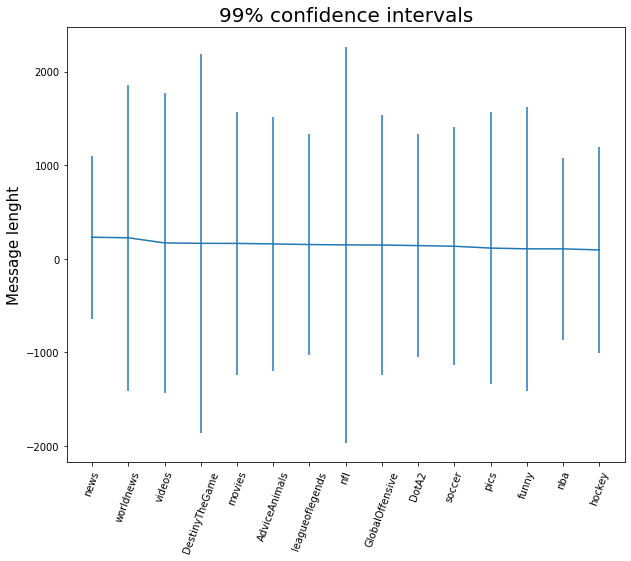

In [32]:
#Sort based on average length of posts
messages_lengths_pd = messages_lengths.toPandas().sort_values(['avg(MessageLength)'], ascending=False)
sorted_message_length = posts_count_pd.sort_values(['MessageLength'], ascending=False)

#Keep 99% intervals for each subreddit group
conf_intervals = []
for i in range(len(messages_lengths_pd.index)):
    lower, upper = np.percentile(messages_lengths_pd['lengths'].loc[i], [0.5, 99.5])
    conf_intervals.append(upper - lower)

#----------------------Plotting-------------------------#
plt.figure(figsize=(10,8))
plt.title("99% confidence intervals", fontsize = 20)
plt.xticks(rotation=70)
plt.ylabel("Message lenght", fontsize = 15)
plt.errorbar(sorted_message_length['subreddit'], sorted_message_length["MessageLength"], yerr = conf_intervals)
plt.show()

Observing the large 99% confidence intervals in every subreddit we can conclude the message length varies greatly in every group. Moreover, observing the means, the highest is news, where most of the people wants to express their oppinions whereas the smallest is the one for hockey and NBA where users may just shortly comment on the newest highlights.

### B1.3. Identify the subreddit with the highest average score

Print the list of subreddits sorted by their average content scores.

In [33]:
Reddit_scores.registerTempTable("Reddit_scores")

query = """
SELECT reddit_posts.subreddit, avg(reddit_scores.score) as AverageScore
FROM reddit_scores, reddit_posts
WHERE reddit_posts.id = reddit_scores.id
GROUP BY reddit_posts.subreddit
ORDER BY AverageScore DESC
"""

post_scores = spark.sql(query)
post_scores.show()

+---------------+------------------+
|      subreddit|      AverageScore|
+---------------+------------------+
|         videos|12.649445152612358|
|           pics|12.216559020162904|
|          funny|12.041505399058655|
|  AdviceAnimals|11.251695791717447|
|         soccer|10.634627593554693|
|         movies|  9.82014997137628|
|            nfl| 9.048348913155358|
|            nba| 9.032795071943161|
|           news| 8.673421150697779|
|      worldnews|  7.86683719564787|
|         hockey| 6.520120515039979|
|leagueoflegends| 5.983557531701479|
|          DotA2| 4.880537971129092|
|GlobalOffensive| 4.351442475073099|
| DestinyTheGame|3.0288819084811953|
+---------------+------------------+



As we can observe from our results above the subreddit with the highest average score is the ***videos*** subreddit.

## B2. Moderator assignment based on Subreddit Textual Content

Different subreddits follow different communication styles inherent in the topic and the community. Having said that, the goal is to discover similar subreddits by only looking at the *words* present in the posted messages. Once such a list of similar subreddits is identified, an appropriately chosen moderator can then be assigned to all these subreddits.

Specifically, the task boils down to computing a similarity score between two subreddits based on the *words* present in their textual content. Your first idea is to use the *Jaccard similarity*, which is defined as the size of the intersection of two sets divided by the size of their union.

$Jaccard(A,B) = \frac{|A \cap B|}{|A \cup B|}$

In [34]:
spark

In [35]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

We defined a new function to draw heatmaps only for easy of use and readibility as the same code would have been used in multiple places. In addition to that this funciton does also the calculation of ***Jaccard*** similarity score.

In [36]:
def plot_heatmap(pandasDataframe, title,columnForJaccard):
    
    length = len(pandasDataframe)
    heat = np.empty([length,length])
    for index1, row1 in pandasDataframe.iterrows():
        for index2, row2 in pandasDataframe.iterrows():
            heat[index1,index2] = jaccard_similarity(row1[columnForJaccard],row2[columnForJaccard])
    
    labels = []
    for index, row in pandasDataframe.iterrows():
        labels.append(row['subreddit'])
    
    rounded = np.around(heat,3)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(rounded)

    ax.set_xticks(np.arange(length))
    ax.set_yticks(np.arange(length))

    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    for i in range(length):
        for j in range(length):
            text = ax.text(j,i, rounded[i,j], ha="center", va="center", color="w")
    ax.set_title(title)
    fig.tight_layout()
    plt.show()
    return heat[-2]

### B2.1.
The first step requires constructing a set representation of each subreddit. The goal is to represent each subreddit as a *set of words* existing in the messages posted on that subreddit. Compute the 50,000 most frequent words across all the provided subreddits. Construct a representation for each subreddit by retaining only the words found in the previously identified set of 50,000 frequent words.

Some rules:
 * Words are defined as tokens matching the regular expression `\W`
 * Remove all the stop-words (English language)

*Note: You might find the [RegexTokenizer](https://spark.apache.org/docs/2.2.0/ml-features.html#tokenizer) and the [StopWordsRemover](https://spark.apache.org/docs/2.2.0/ml-features.html#stopwordsremover) utilities available in the package pyspark.ml useful for this task as they help you in transforming the features and removing stopwords.*

In [37]:
from pyspark.ml.feature import Tokenizer, RegexTokenizer
from pyspark.ml.feature import StopWordsRemover

In [38]:
''' Add your code here '''
Reddit_posts.registerTempTable("Reddit_messages")

query = """
SELECT  reddit_posts.subreddit, reddit_posts.body
FROM reddit_posts
"""

messages = spark.sql(query)
regexTokenizer = RegexTokenizer(inputCol="body", outputCol="words", pattern="\\W") #set up the tokenizer
messages = regexTokenizer.transform(messages) #run the tokenizer on the input
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
messages = remover.transform(messages)

In [39]:
fl_words_count = messages.select(explode(messages["filtered"]).alias("fl_words")).groupBy("fl_words").count()
fl_words_count = fl_words_count.sort("count",ascending=False)
fl_words_count.show()

+--------+-------+
|fl_words|  count|
+--------+-------+
|    like|1018978|
|  people| 745031|
|     get| 691349|
|     one| 682820|
|   think| 575352|
|       m| 569057|
|      re| 517827|
|     com| 497303|
|    time| 456060|
|    good| 454768|
|    game| 452376|
|  really| 451527|
|    even| 432973|
|    know| 413379|
|      gt| 404776|
|    http| 395552|
|    well| 352021|
|     see| 351081|
|    much| 348304|
|    also| 333478|
+--------+-------+
only showing top 20 rows



We first got all the posts bodies and their related subreddits through an SQL query to spark. Our next step consists of seperating all the words and removing the stop words as per instructions. This step is trivial since we use libraries for both of them, and the StopWordRemover also has predefined words for the English language. Hence in the end we are left with a dataframe that has four columns the extra two being the words seperated and then another column for when those words are filtered. 

In order to be able to find the 50000 top most frequent words we first need to seperate them from all the other words so that there is a word per row. Thus we simply use explode filtered word section of the dataframe that we got before. Then we group by that section again and count the occurences. In the end the sorting is the only thing left to do. After they are sorted we print them in order to be able to further investigate them and maybe gain some insight into the data and correlate it to later results.

From an initial view of the results we can draw two conclusions mainly. The first one being that the most common words seem to be very generic words i.e. **like**, **people**,***get*** and etc. This is though not unexpected as these are the words that are common among all subreddits and as a result they would be the ones that have the highest frequency. However this would imply also that these words would not be a differentiating factor that could help us set two subreddits appart, as they do not contain ***alone*** any information relating to any particular subreddit. The second observation is that the frequency of these words is taking a distribution that looks like Zipf's Law (power law distribution). This is especially apparent if we go from the top values as they have pretty high values which start decreassing more rapidly. In addition to this, if we were to look at the botton values of the 50000 most frequent words we would notice that those words would all have a frequency of around 44. This would lead us to believe that those words might be to specific per reddit and maybe even per user. However since the same user might be in multiple subreddits, these words still might offer insight in to a subreddit compared to the one that are the most frequent one. 

In [40]:
''' Take the most frequent 50k words '''
top_50k = fl_words_count.take(50000) #we can simply take the top 50k since the data is now sorted, we have that guarantee
print(top_50k[-20:]) #to see the least most frequent words from the 50k words
top_50k_words = [words for words, count in top_50k] #remove the count part and have only a list of the most frequent 50k words

[Row(fl_words='concave', count=44), Row(fl_words='brittish', count=44), Row(fl_words='recolour', count=44), Row(fl_words='megadeth', count=44), Row(fl_words='asgardians', count=44), Row(fl_words='anglophone', count=44), Row(fl_words='absofuckinglutely', count=44), Row(fl_words='douchecanoe', count=44), Row(fl_words='toothed', count=44), Row(fl_words='styx', count=44), Row(fl_words='jazzed', count=44), Row(fl_words='deletions', count=44), Row(fl_words='teeming', count=44), Row(fl_words='2fsoccer', count=44), Row(fl_words='wht', count=44), Row(fl_words='peenoise', count=44), Row(fl_words='_that_', count=44), Row(fl_words='palmeiras', count=44), Row(fl_words='013', count=44), Row(fl_words='freshen', count=44)]


In [41]:
fl_words_id = messages.select("subreddit", explode(messages["filtered"]).alias("fl_words")) #explode the tokenized words to id and word
fl_words_id = fl_words_id.where(fl_words_id.fl_words.isin(top_50k_words)) #remove the words that are not part of the list
fl_words_id = fl_words_id.distinct()
messages_cleaned = fl_words_id.groupBy("subreddit").agg(collect_list("fl_words").alias("words"))

In order to check if a word is part of the 50000 most frequent word list, we first explode again the list of words to have a single word and subreddit pairs. Then we go through those pairs and check if that word is in our list in order to decide if we will keep it or not. After that we remove the duplicate pairs, since a word might appear in a subreddit more than once. Ultimately we group by subreddit and aggergate all the words into a list that is inherent to each subreddit.

### B2.2.
* Compute the Jaccard similarity between all the subreddits using the set representation obtained in step **B2.1.**, and plot in a heatmap the similarity values of all the pairs of subreddits.
* Analyze this plot and discuss your observations. Do you observe that subreddits corresponding to similar topics possess higher Jaccard similarity?
* Provide detailed interpretations of the obtained results. Specifically,
    - Explain the limitations of your conclusions, and discuss the potential reasons.
    - Explain the potential problems with the Jaccard similarity function.

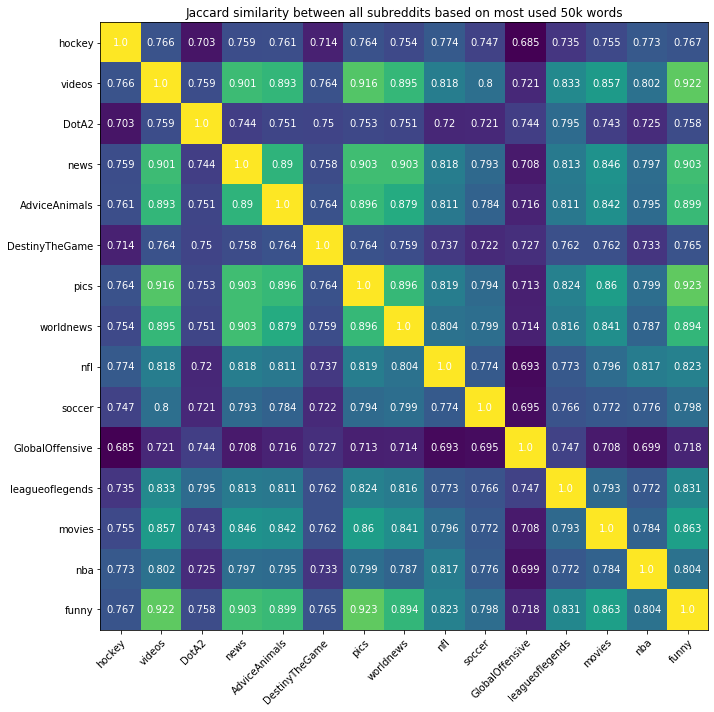

In [42]:
messages_cleaned_pd = messages_cleaned.toPandas()
nba_50k = plot_heatmap(messages_cleaned_pd, "Jaccard similarity between all subreddits based on most used 50k words", 'words')

***NOTE:*** Whenever we say subreddit 1 and subreddit 2 we use the x axis for subreddit 1 and the y axis for subreddit 2.

We convert the resulting dataframe to a pandas dataframe and then pass it to our function which does the similarity calculations and the plotting, whereby we get the resulting heatmap. 

The first thing that we should observe is that this heat map is mirrored along the diagonal which is colored in yellow. Another point is the way how we should interpret the values. This can be concluded also by simply looking at the heatmap since we also have the score between the same subreddits. However, to just point it out the closer the value between two subreddits is to one the more similiar those two are. Furthermore, since this is a heatmap we can infer those results based on the color where the main two ones are green and blue. Green would mean more similiar and blue less.

Initially, we can see that all the scores are high hence we will only consider as the ones close to or above 0.9 as similiar as those represent the most interest to us. Furthermore, the reason for the high scores in general might come from the most frequent words. Thus those words might be diluting the difference between two subreddit groups. However, we can visually distinguish some green areas with a high similarity score seperated from the others. The first one being the relations between videos and the subreddits funny, pics, worlnews, AdviceAnimals and news. We observe that the video subreddit has a high similarity score with these subreddits, because the group videos *semantically* encompases these other groups in some way or another. As an example take the funny subreddit where users might post jokes in general which might lead to certain reactions from the group. However, funny videos might be uploaded which can lead to similiar reaction between the users and as such lead to a high similarity score. The same line of arguing to be used also for the others to reason why they are so similiar with the videos subreddit. 

The way we do similarity scoring in this case would entail that two groups that have something similiar with one group, will at least have the least of those two groups similiar with each other. This is exactly what we see from the results above as well. Whereby the subreddits news, worldnews, AdviceAnimals, pics and funny have a high similarity score between themselves too. The only reason why they have such a high similarity between one another is that they invoke the use of a similiar vocabulary from their users. This is a downside of the Jaccard similarity calculations as it only observes the occurence of those words and nothing else. Hence these words might be used in a different context order which might lead to some of them having completely different results. This represents an inherent limitation to Jaccard as two groups might have the same set of words, however they might at the same time be completely different just because of the use of the words. Moreover, another pontential problem may be the set of words chosen. As argued above, the most frequent words in our set do not entail any particular information that would be specific to a group or at least a set of groups.

### B2.3.

* Alternatively, compute the 1000 most frequent words for each subreddit, construct its representation as the set of top-1000 words, and print a heatmap with the Jaccard similarity like in step **B2.2.**.
* Explain your observations in detail: how and why is this new result different from the one obtained in **B2.2.**?

*Note: Use the same rules specified in B2.1: words tokenized with the regex \W and stop-words removed*

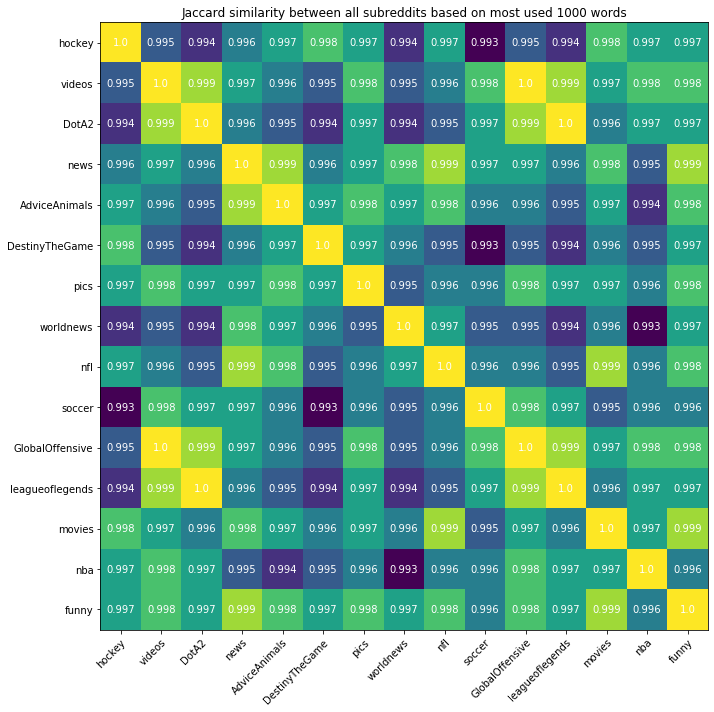

In [43]:
''' Retriving the top 1K words and redoing the calculations  '''
top_1k = fl_words_count.take(1000)
top_1k_words = [words for words, count in top_1k] #remove the count part and have only a list of the most frequent 50k words
fl_words_id = messages.select("subreddit", explode(messages["filtered"]).alias("fl_words")) #explode the tokenized words to id and word
fl_words_id = fl_words_id.where(fl_words_id.fl_words.isin(top_1k_words)) #remove the words that are not part of the list
fl_words_id = fl_words_id.distinct()
messages_cleaned = fl_words_id.groupBy("subreddit").agg(collect_list("fl_words").alias("words"))
messages_cleaned_pd = messages_cleaned.toPandas()
nba_1k = plot_heatmap(messages_cleaned_pd, "Jaccard similarity between all subreddits based on most used 1000 words", 'words')

Using only the top 1000 most frequent words provides us with a result that we could have easily forseen based on our previous analysis. What it simply implies is that the most frequent words are present everywhere and as we argued above those words do not entail any information on their own or at least they are not very specific. Hence they are present in every subreddit. All of the scores are above 0.99 and differ only based on the third decimal place which would mean that there is a handful of words that are not present in any two subreddits. Eventhough the heatmap seems to have a couple of subreddit groups that are different from one another, that is only as a result of colouring and if we actually look at the values we see that they are pretty similiar. This result is to be expected as we removed from our previous similarity calculations (using 50K) the words which could be a bit more specific to a subreddit. Hence using in this similarity score calculation there is not much information that we can get out of the resulting data.

## B3. Moderator assignment based on Subreddit Users

Subreddits can be seen as communities of people interacting about a common topic. As an alternative to the *textual content* based similarity in **B2**, your task here is to validate if similarity between two subreddits can be measured based on their participating users.

Of course users are not monothematic, and they interact with multiple subreddits. In this task, we are specifically interested in observing the amount of overlap across different subreddits based on their participating users. Similar to **B2**, the overlap is measured using the *Jaccard similarity*.


### B3.1.
Construct a set representation of each subreddit as the users that posted at least one time in that subreddit.

Some users are very talkative and active across different topics. Print the username of the person that posted in the maximum number of subreddits. *Note that users who posted at least once in a subreddit are considered as participant of that subreddit.*

In [44]:
''' Get the subredits and the users that posted in those subredits'''
Reddit_posts.registerTempTable("Reddit_messages_author")

query = """
SELECT  reddit_posts.subreddit, reddit_posts.author
FROM reddit_posts
"""

authors = spark.sql(query)

In [45]:
''' Get the person who did the most posts '''
#first remove the duplicates so when a person posts multiple times in a subreddit
max_author = authors.groupBy("subreddit","author").count()
#now we can simply group by author and get the maximum one
max_author = max_author.groupBy("author").count().sort("count", ascending = False)
max_author.show()

+--------------------+-----+
|              author|count|
+--------------------+-----+
|             whispen|   15|
|             PaidBot|   14|
|       AutoModerator|   13|
|Really_Like_Pancakes|   13|
|        Fortehlulz33|   12|
|       IamGrimReefer|   12|
|           vannucker|   12|
|          eaglessoar|   12|
|         ConcedeDota|   12|
|   you_get_CMV_delta|   12|
|LeAtheist_Swagmaster|   12|
|            Galactic|   12|
|   PitchforkEmporium|   12|
|      BigLebowskiBot|   12|
|            voxpupil|   12|
|     naturelover7777|   12|
|        poopsmith666|   12|
|        TreeFiddyBot|   12|
|              Tashre|   12|
|     TheSublimeLight|   12|
+--------------------+-----+
only showing top 20 rows



***Most subreddits:*** We can see from the results above that the user who posted in the highest number of subreddits is ***whispen***. The value is 15 which means he posted in all of the subreddits.

In [46]:
''' Remove the duplicated and group by sub reddit - practically what we did with the words'''
authors = authors.distinct()
subredditWithAuthors = authors.groupBy("subreddit").agg(collect_list("author").alias("authors"))
subredditWithAuthors_pd = subredditWithAuthors.toPandas()

In order to get the author list for each subreddit we do the same set of operations as used to set up the data for the words calcualations. After we get the pairs author and subreddit, we remove the duplicates as the same author might have posted in the same subreddit more than once. After that we simply group the authors based on subreddit and aggergate them to a list of authors, such that each subreddit has its own list of participating authors. In the end we convert this result to a pandas dataframe in order to calculate the similarity results and the heatmap. 

### B3.2.

* Compute the Jaccard similarity between all the subreddits using the set representation obtained in step **B3.1.**, and visualise it similar to **B2**.
* Analyze this plot, identify highly similar pairs of subreddits, and clearly describe your observations.

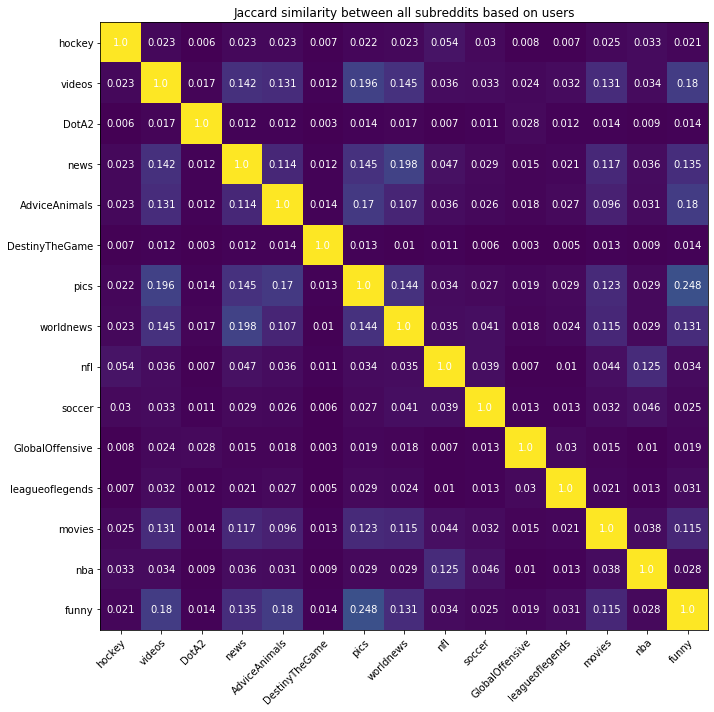

In [47]:
nba_users = plot_heatmap(subredditWithAuthors_pd, "Jaccard similarity between all subreddits based on users", 'authors')

Immediately we can see from the visualized data that the scores using users are much lower than those using words. However we can clearly observe that the similiar groups that we identified on the first set (50000 words) are still present here. Thereby only implying that the same user will use the same vocabulary in different subreddits thus adding to the similarity score based on the words. Besides the relation between the subreddits such as videos, funny, worldnews, pics, AdviceAnimals and news that is preserved, we also can observe some new relations. For example to the previous mentioned group, the subreddit *movies* is also added. Whereby the subreddits part of that group have a high similarity score between one another.

However, new relation is that between nfl and nba, but none of them has a high score with another presented sport in the dataset; the soccer. It is reasonable to assume that nfl and nba might have a higher similarity score, since both sports are popular in the USA. It might be also expected that users from that country who like one might also like the other. Besides these relations, there seem to be no other relations based on this way of scoring.

## B4. Language vs. Users similarity
    
* Visualize the similarity scores based on word (**B2.3.**) and user (**B3**) similarity on the x and y axes respectively for the subreddit `NBA` compared to all the other subreddits. Do some semantically meaningful groups emerge? Provide clear explanataions of your observations.
* Furthermore, do you observe differences in similarities between various sports-related subreddits in the dataset? Please provide explanations of the reasons behind these differences, if any!

In [48]:
'''Removing the outlier nba nba with value 1'''
nba_users = np.delete(nba_users,13)
nba_1k = np.delete(nba_1k,13)
nba_50k = np.delete(nba_50k,13)

In [54]:
import matplotlib.lines as mlines

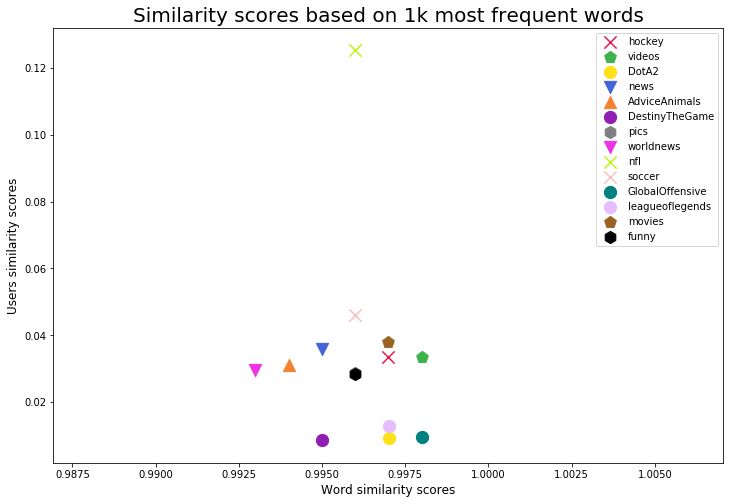

In [49]:
labels = []
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#808080', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#000000']
markers = ["x" , "p" , "o" , "v" , "^" , "o", "h", "v", "x" , "x" , "o" , "o", "p", "h"]

for index, row in subredditWithAuthors_pd.iterrows():
    labels.append(row['subreddit'])
labels.remove('nba')

fig, ax = plt.subplots(figsize=(12, 8))

for i in range(len(labels)):
   ax.scatter(nba_1k[i], nba_users[i] , c = colors[i], marker = markers[i], s= 150, label=labels[i])

ax.legend()
ax.set_xlabel('Word similarity scores', fontsize = 12)
ax.set_ylabel('Users similarity scores', fontsize = 12)
plt.title("Similarity scores based on 1k most frequent words", fontsize = 20)
plt.show()

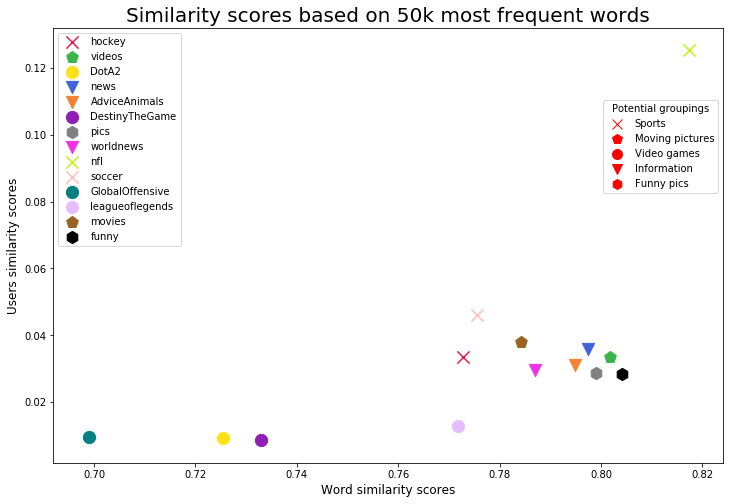

In [67]:
labels = []
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#808080', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#000000']
markers = ["x" , "p" , "o" , "v" , "v" , "o", "h", "v", "x" , "x" , "o" , "o", "p", "h"]

for index, row in subredditWithAuthors_pd.iterrows():
    labels.append(row['subreddit'])
labels.remove('nba')

fig, ax = plt.subplots(figsize=(12, 8))

for i in range(len(labels)):
   ax.scatter(nba_50k[i], nba_users[i] , c = colors[i], marker = markers[i], s= 150, label=labels[i])

#Add legends for groupings
leg1 = ax.legend()
sports = mlines.Line2D([], [], color='red', marker='x', linestyle='None',
                          markersize=10, label='Sports')
moving_pictures = mlines.Line2D([], [], color='red', marker='p', linestyle='None',
                          markersize=10, label='Moving pictures')
video_games = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                          markersize=10, label='Video games')
information = mlines.Line2D([], [], color='red', marker='v', linestyle='None',
                          markersize=10, label='Information')
no_idea = mlines.Line2D([], [], color='red', marker='h', linestyle='None',
                          markersize=10, label='Funny pics')

plt.gca().add_artist(leg1)

plt.legend(handles=[sports, moving_pictures, video_games, information, no_idea], loc = (0.82,0.62), title = 'Potential groupings')

ax.set_xlabel('Word similarity scores', fontsize = 12)
ax.set_ylabel('Users similarity scores', fontsize = 12)
plt.title("Similarity scores based on 50k most frequent words", fontsize = 20)
plt.show()

Our main goal in representing the data was to make everything easily readible. We made assumptions about which groups could be similar and we differentiated subreddits into different categories with different symbols. For example, nfl, soccer and hockey (nba is absent since we are using its data) can be categorized as sports. Thus, we used **X** to mark them. Furthermore, we will be basing our arguments on the plot with 50000 words plot, because as argued above, the 1000 most frequent words scores do not provide as much insight as the 50000 ones.

The first grouping we observe is the one between news, funny, AdviceAnimals, pics and videos. Here we can see that the users from the subreddit group of NBA who are in one of these groups might also be in the other group located in this cluster. We could label these groups as topics where you do not need lot of background knowledge about to contribute. However, the groups of worldnews and movies are further away which challenges our original assumption of groupings. This can be contributed to the fact they probably have cultural interrest, therefore using more sophisticated vocabulary.

Another relation that became apparent looking at the user similarity score is the one between the nba subreddit and the nfl one. We can observe that the nba has a much lower similarity score compared to other sports like soccer and hockey. Furthermore, it seems like the authors of nba have also the highest similarity score based on the word similarity score, which can be attributed to them having a higher amount of same users.

Last observation is the low similarity of nba and Video games (League of legends, Dota2, Destiny, Global offensive) based on users. This can be argued as simply individuals who prefer different forms of entertainments, while their high word similarity may be attributed to them being competitive sports in some way and also from the arguments presented earlier on the word similarity score.